<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's


#### Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

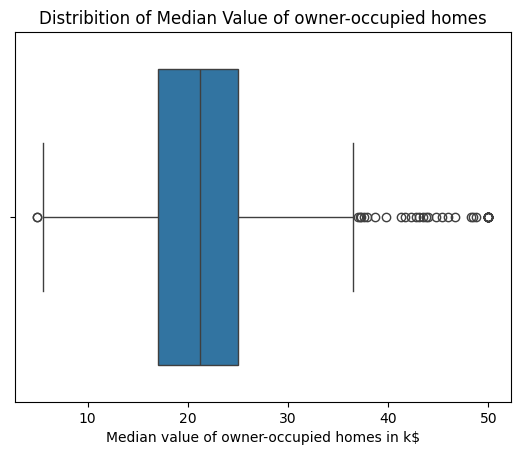

In [22]:
ax = sns.boxplot(x="MEDV", data=boston_df)
pyplot.title('Distribition of Median Value of owner-occupied homes')
pyplot.xlabel('Median value of owner-occupied homes in k$')
pyplot.show()

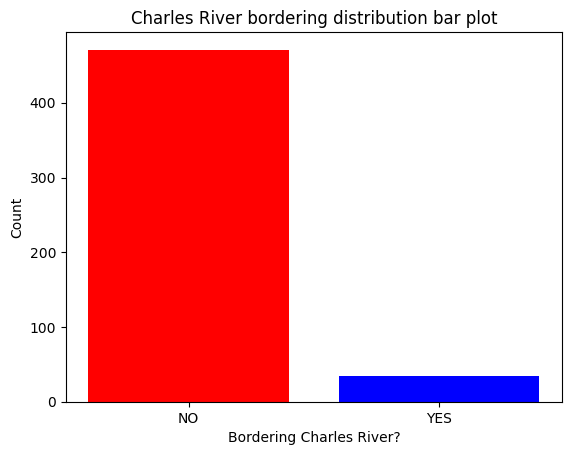

In [19]:
boston_df.loc[(boston_df['CHAS'] <= 0.5), 'CharlesRiver'] = 'NO'
boston_df.loc[(boston_df['CHAS'] > 0.5), 'CharlesRiver'] = 'YES'
pyplot.bar(boston_df.CharlesRiver.unique(),boston_df.CharlesRiver.value_counts(sort=False),color=['red','blue'])
pyplot.xlabel('Bordering Charles River?')
pyplot.ylabel('Count')
pyplot.title('Charles River bordering distribution bar plot')
pyplot.show()

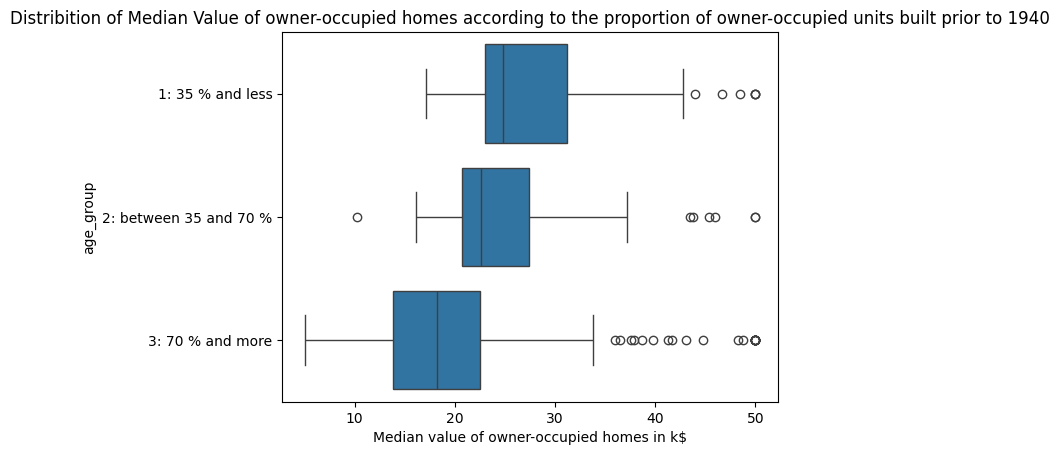

In [48]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '1: 35 % and less'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '2: between 35 and 70 %'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '3: 70 % and more'

ax = sns.boxplot(x="MEDV", y="age_group", data=boston_df, order = ['1: 35 % and less', '2: between 35 and 70 %', '3: 70 % and more' ])
pyplot.title('Distribition of Median Value of owner-occupied homes according to the proportion of owner-occupied units built prior to 1940')
pyplot.xlabel('Median value of owner-occupied homes in k$')
pyplot.show()

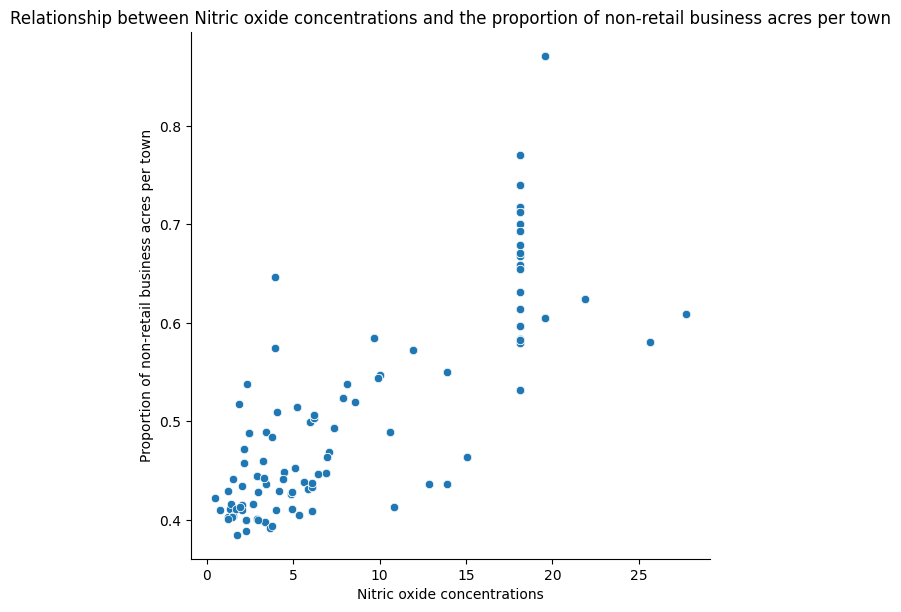

In [34]:
sns.relplot(y="NOX", x="INDUS",
            data=boston_df, height = 6, aspect = 1)
pyplot.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.xlabel('Nitric oxide concentrations')
pyplot.ylabel('Proportion of non-retail business acres per town')

pyplot.show()

There seems to be a strong postive correlation between the variables

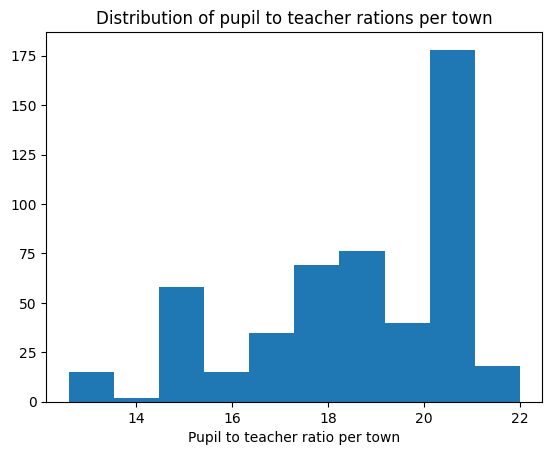

In [37]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.title('Distribution of pupil to teacher rations per town')
pyplot.xlabel('Pupil to teacher ratio per town')
pyplot.show()

#### Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

One independent, categorical variable with two levels or group - CHAR / CharlesRiver
One dependent continuous variable - MEDV
Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
The dependent variable must follow a normal distribution
Assumption of homogeneity of variance

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in the median value of houses between those bounded by the Charles river and those that are not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in the median value of houses between those bounded by the Charles river and those that are not")

We can plot the dependent variable with a historgram


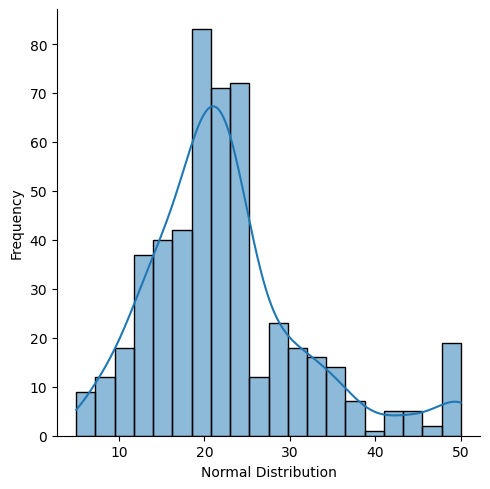

In [43]:
ax = sns.displot(boston_df['MEDV'],
                  bins=20,
                  kde=True)
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
pyplot.show()
## technically not a normal distribution

In [44]:
scipy.stats.levene(boston_df[boston_df['CharlesRiver'] == 'YES']['MEDV'],
                   boston_df[boston_df['CharlesRiver'] == 'NO']['MEDV'], center='mean')

# p-value is lower than 0.05 - technically we cannot assume equality of variance. Let's continue for this exercise.

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

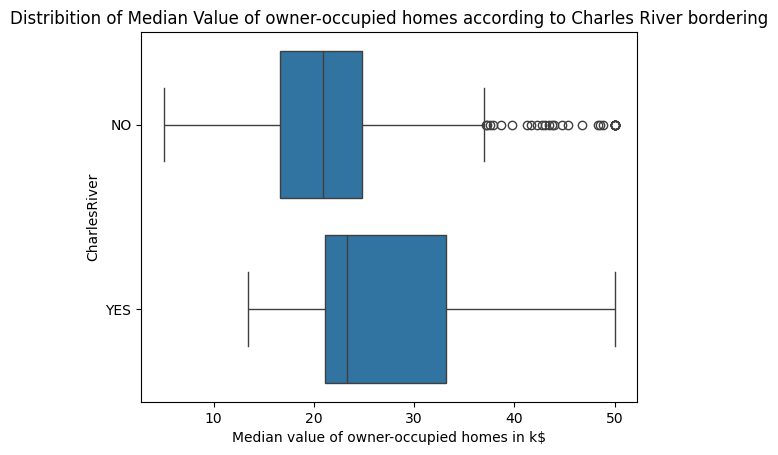

In [46]:
ax = sns.boxplot(x="MEDV", y="CharlesRiver", data=boston_df)
pyplot.title('Distribition of Median Value of owner-occupied homes according to Charles River bordering')
pyplot.xlabel('Median value of owner-occupied homes in k$')
pyplot.show()

In [45]:
scipy.stats.ttest_ind(boston_df[boston_df['CharlesRiver'] == 'YES']['MEDV'],
                   boston_df[boston_df['CharlesRiver'] == 'NO']['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value based on Charles River bordering


#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

Test for equality of variance

In [49]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '1: 35 % and less']['MEDV'],
                   boston_df[boston_df['age_group'] == '2: between 35 and 70 %']['MEDV'], 
                   boston_df[boston_df['age_group'] == '3: 70 % and more']['MEDV'], 
                   center='mean')
# since the p-value is higher than 0.05, the variance are equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

First, separate the three samples (one for each age category) into a variable each.

In [50]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '1: 35 % and less']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == '2: between 35 and 70 %']['MEDV']
seventy_higher = boston_df[boston_df['age_group'] == '3: 70 % and more']['MEDV']

In [51]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_higher)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations are not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations are correlated with proportion of non-retail business acres per town


In [52]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

####  What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


State the hypothesis:

*   $H\_0:$ there is no difference in the median value of houses with respect to the distance to the five Boston employment centres
*   $H\_1:$ there is a difference in the median value of houses with respect to the distance to the five Boston employment centres


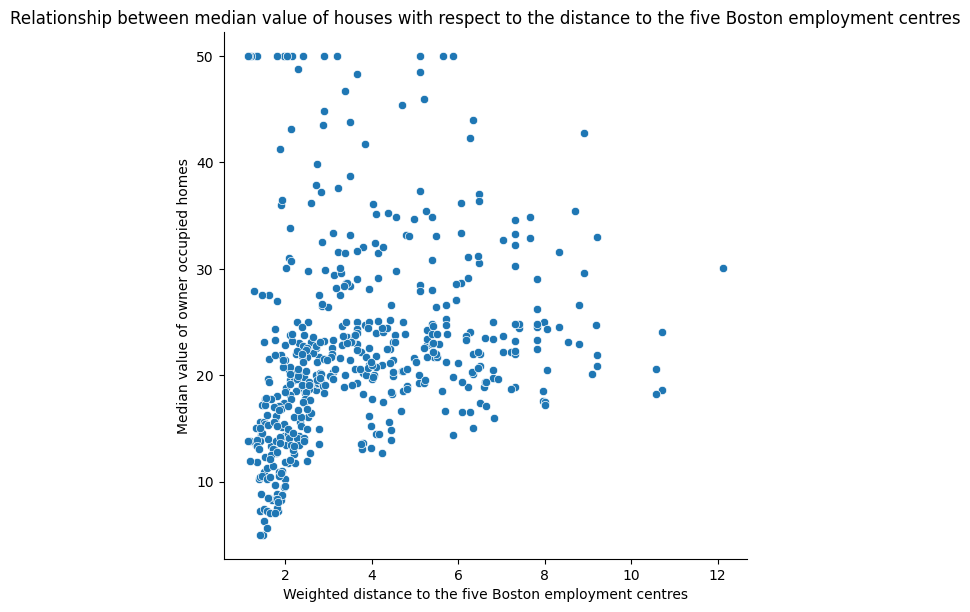

In [54]:
sns.relplot(y="MEDV", x="DIS",
            data=boston_df, height = 6, aspect = 1)
pyplot.title('Relationship between median value of houses with respect to the distance to the five Boston employment centres')
pyplot.xlabel('Weighted distance to the five Boston employment centres')
pyplot.ylabel('Median value of owner occupied homes')

pyplot.show()

In [53]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 28 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        23:16:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since Prob (F-statistic):	1.21e-08,  there is evidence of correlation between weighted distance to the five Boston employment centres and the median value of owner occupied homes

In [58]:
## The slope of the model will give the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
model.params.DIS

1.091613015841107

This means that for every increase in DIS by 1, the median value of owner occupied homes increases by 1.091613015841107 * 1000 \\$ = 1091.61 \\$ (rounded to the nearest cent)